# Análisis y visualización de datos de Tokyo_Airbnb 

<img src="https://upload.wikimedia.org/wikipedia/commons/6/69/Airbnb_Logo_B%C3%A9lo.svg" style= "height:150px;float:left;">

### Fases

#### 1. Descripción de los datos

#### 2. Verificar calidad de datos

#### 5. Limpiar datos (amputación e imputación)

#### 6. Construir el modelo

#### 7. Evaluar el modelo

#### 8. Evaluar los resultados

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd #geopandas es un paquete de desarrollo dedicado a describir ubicaciones geográficas, además necesita saber sobre geohash
import matplotlib.pyplot as plt
from IPython.display import HTML

In [7]:
#leer datos
datos = pd.read_csv('tokyo_airbnb.csv')

# Exploración básica del dataset

In [5]:
datos

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month
0,35303,"La Casa Gaienmae C Harajuku, Omotesando is nearby",151977,Miyuki,NaN,Shibuya Ku,35.67152,139.71203,Private room,4196,28,18,2018-07-28,0.20
1,197677,Oshiage Holiday Apartment,964081,Yoshimi & Marek,NaN,Sumida Ku,35.71721,139.82596,Entire home/apt,10975,3,156,2019-05-21,1.65
2,289597,Private apt in central Tokyo #203,341577,Hide&Kei,NaN,Nerima Ku,35.74267,139.65810,Entire home/apt,4196,30,107,2019-05-25,1.25
3,370759,"Cozy flat #203, local area YET 10 mins to shib...",1573631,"Gilles,Mayumi,Taiki",NaN,Setagaya Ku,35.66344,139.65593,Entire home/apt,6994,29,99,2019-05-07,1.55
4,700253,Private apt in central Tokyo #201,341577,Hide&Kei,NaN,Nerima Ku,35.74264,139.65832,Entire home/apt,3981,30,101,2019-05-03,1.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11461,36083287,1min to station · Skytree/Tatami hotel/new design,235406925,Sayoko佐代子,NaN,Sumida Ku,35.70862,139.81393,Entire home/apt,21951,1,0,NaN,NaN
11462,36083512,Asakusa Wired house 5pax near by UENO/AKIHABARA,267481408,Hyongsu,NaN,Taito Ku,35.72464,139.78078,Entire home/apt,7747,1,0,NaN,NaN
11463,36084566,东京精品民宿,161702799,Yang,NaN,Toshima Ku,35.73587,139.73397,Private room,56275,1,0,NaN,NaN
11464,36085357,#4 DIRECT ACCESS TO DISNEY IN BUS! 3MIN TO STA...,208189463,Shotaro,NaN,Edogawa Ku,35.66255,139.87236,Entire home/apt,6456,1,0,NaN,NaN


In [12]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11466 entries, 0 to 11465
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   11466 non-null  int64  
 1   name                 11466 non-null  object 
 2   host_id              11466 non-null  int64  
 3   host_name            11450 non-null  object 
 4   neighbourhood_group  0 non-null      float64
 5   neighbourhood        11466 non-null  object 
 6   latitude             11466 non-null  float64
 7   longitude            11466 non-null  float64
 8   room_type            11466 non-null  object 
 9   price                11466 non-null  int64  
 10  minimum_nights       11466 non-null  int64  
 11  number_of_reviews    11466 non-null  int64  
 12  last_review          9789 non-null   object 
 13  reviews_per_month    9789 non-null   float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB


#### Descubierto por una simple descripción de los datos:

##### 1.Hay 14 columnas de características en total, cada una con11466 datos.
##### 2.Hay 4 columnas con algún grado de falta (host_name/neighbourhood_group/last_review/reviews_per_month)

### Primero, un procesamiento simple y descripción de algunas características.

In [14]:
# Hay tres tipos de habitaciones en total: conjunto completo, habitación individual y habitación para varias personas
datos['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

<BarContainer object of 3 artists>

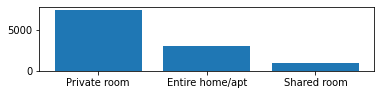

In [15]:
#El análisis de las salas muestra que la mayoría de ellas se alquilan en conjunto, y pocas salas públicas se alquilan.
plt.subplot(311)
data = datos['room_type'].value_counts().tolist()
a = datos['room_type'].unique()
plt.bar(x=a, height=data)

In [16]:
#Se puede ver que host_name está relativamente concentrado, lo que puede confirmar la conclusión extraída en las listas de host_calculadas en el tipo continuo anterior.Vamos a verlo en detalle.
datos[['host_name','name']].groupby('host_name').count().sort_values(by='name', ascending=False)

,name
host_name,
M-1 Tokyo,133
Hiroshi,103
Hiro,78
Yuka,77
Plays,76
...,...
Takaaki,1
Takahiko,1
Takako,1


In [17]:
#La ubicación de la casa de familia está relativamente concentrada, aquí hay una mirada específica a las áreas
datos['neighbourhood'].value_counts()

Shinjuku Ku            1882
Taito Ku               1670
Toshima Ku             1228
Sumida Ku               879
Shibuya Ku              854
Ota Ku                  598
Minato Ku               551
Chuo Ku                 448
Setagaya Ku             305
Suginami Ku             299
Nakano Ku               290
Katsushika Ku           280
Arakawa Ku              279
Itabashi Ku             237
Kita Ku                 217
Edogawa Ku              201
Chiyoda Ku              198
Adachi Ku               172
Shinagawa Ku            170
Koto Ku                 152
Bunkyo Ku               129
Meguro Ku                84
Nerima Ku                62
Hachioji Shi             37
Machida Shi              24
Oshima Machi             22
Nishitokyo Shi           19
Musashino Shi            18
Hino Shi                 17
Mitaka Shi               13
Akiruno Shi              12
Higashimurayama Shi      12
Chofu Shi                11
Kokubunji Shi             9
Kodaira Shi               8
Hachijo Machi       

In [18]:
datos['neighbourhood'].value_counts().index[0]

'Shinjuku Ku'

### La mayoría de las casas se concentran en el distrito de 'Shinjuku Ku', 'Taito Ku' y 'Toshima Ku'  .
### El tipo de habitación se basa básicamente en todo el grupo, complementado con una habitación individual, hay menos habitaciones para varias personas

## Explorar Metas
#### 1.Región (distribución, precio)
#### 2.Casas de familia (top 10 casas de familia más populares, cuáles son las características de las casas de familia más populares)
#### 3.Perspectiva del arrendador (clasificación de los tipos de arrendadores, estimaciones de los ingresos de los arrendadores)